In [6]:
import numpy as np
import matplotlib.pyplot as plt


Minimize
Track 2290 0.4990308
Track 2291 0.47250015
Track 2292 0.48409513
Track 2293 0.55413574
Track 2294 0.39760327
Track 2295 0.62667227
Track 2296 0.48577404
Track 2297 0.70450974
Track 2298 0.5610862
Track 2299 0.68758434
Track 2300 0.67309606
Track 2301 0.5255055
Track 2302 0.6980841
Track 2303 0.48914254
Track 2304 0.4336017502678765
Track 2305 0.530807
Track 2306 0.3689501
Track 2307 0.5891191
Track 2308 0.47470325
Track 2309 0.7045587
Maximize
Track 1500 0.43675995
Track 1501 0.39083335
Track 1502 0.47064215
Track 1503 0.430952
Track 1504 0.4169132
Track 1505 0.4525236
Track 1506 0.4049529
Track 1507 0.3487808
Track 1508 0.39575475
Track 1509 0.4462835
Track 1510 0.44538873
Track 1511 0.47321782
Track 1512 0.5728281
Track 1513 0.59909075
Track 1514 0.47826073
Track 1515 0.6178141
Track 1516 0.49070071056485176
Track 1517 0.51389766
Track 1518 0.56595564
Track 1519 0.4475037
Random
Track 0 0.79141843
Track 1 0.61335224
Track 2 0.6395982
Track 3 0.65728825
Track 4 0.567752420591

C:\Users\mbart\AppData\Local\Temp\ipykernel_37536\671973937.py:15: RuntimeWarning: Mean of empty slice
  processed = [np.nanmean(arousal) for arousal in arousal_list]


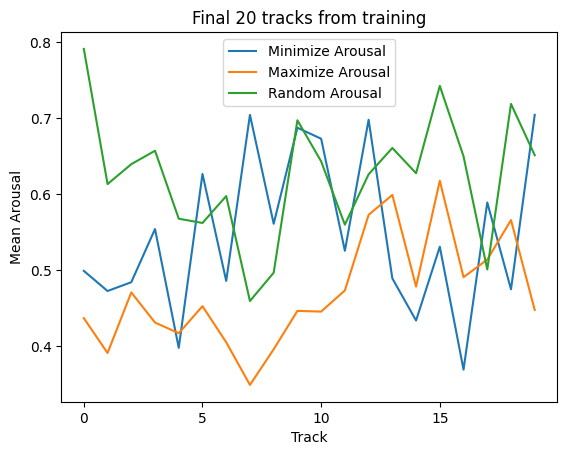

In [23]:
minimize_dict = np.load("./Minimize Arousal Tracks.npy", allow_pickle=True).item()
maximize_dict = np.load("./Maximize Arousal Tracks.npy", allow_pickle=True).item()
random_dict = np.load("./Random_Tracks.npy", allow_pickle=True).item()

plt.figure()
plt.title("Final 20 tracks from training")
plt.xticks([0, 5, 10, 15, 20, 25])
plt.xlabel("Track")
plt.ylabel("Mean Arousal")

for d, obj in zip([minimize_dict, maximize_dict, random_dict], ['Minimize', 'Maximize', 'Random']):
    print(obj)
    list = []
    for i in range(len(d) - 20, len(d)):
        arousal_list = d[f'Track {i}']['Arousals']
        processed = [np.nanmean(arousal) for arousal in arousal_list]
        list.append(np.nanmean(processed))
        print(f"Track {i}", np.nanmean(processed))
    plt.plot(list, label=f"{obj} Arousal")
plt.legend()
plt.show()

In [63]:
from scipy import stats

track_map = {}
components = ['Straight', 'Curve Left', 'Curve Right', 'Loop', 'Ramp']
for d, obj in zip([minimize_dict, maximize_dict, random_dict], ['Minimize', 'Maximize', 'Random']):
    
    for i in range(len(d) - 20, len(d)):
        action_list = d[f'Track {i}']['Actions']
        arousal_list = d[f'Track {i}']['Arousals']
        for i in range(len(action_list)):
            if arousal_list[i]:
                value = np.mean(arousal_list[i])
                
                if action_list[i] not in track_map:
                    track_map[action_list[i]] = [value]
                else:
                    track_map[action_list[i]].append(value)
        
for component in track_map.keys():
    print(components[component], np.round(np.mean(track_map[component]), 4), "+-", np.round(stats.sem(track_map[component]) * stats.t.ppf((1 + 0.95) / 2., len(track_map[component]) - 1), 4))


Curve Right 0.524 +- 0.0297
Ramp 0.3899 +- 0.0314
Loop 0.3535 +- 0.0294
Curve Left 0.5429 +- 0.0327
Straight 0.6351 +- 0.0184
